## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [5]:
data = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
data.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [7]:
data.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge**: Count the number of entries in each column of the dataframe

In [8]:
data.shape
data.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [9]:
data.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [10]:
data.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [12]:
data['DATE'][1]
data.DATE[1]

'2008-08-01 00:00:00'

In [ ]:
type(pd.to_datetime(data['DATE'][1]))

In [15]:
data['DATE'] = pd.to_datetime(data['DATE'])

## Data Manipulation



In [19]:
reshaped = data.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped

In [21]:
reshaped.fillna(0, inplace=True)

In [25]:
reshaped
reshaped.isna().values.any()

False

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped.count()

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped.index, reshaped.java)
plt.plot(reshaped.index, reshaped.python)

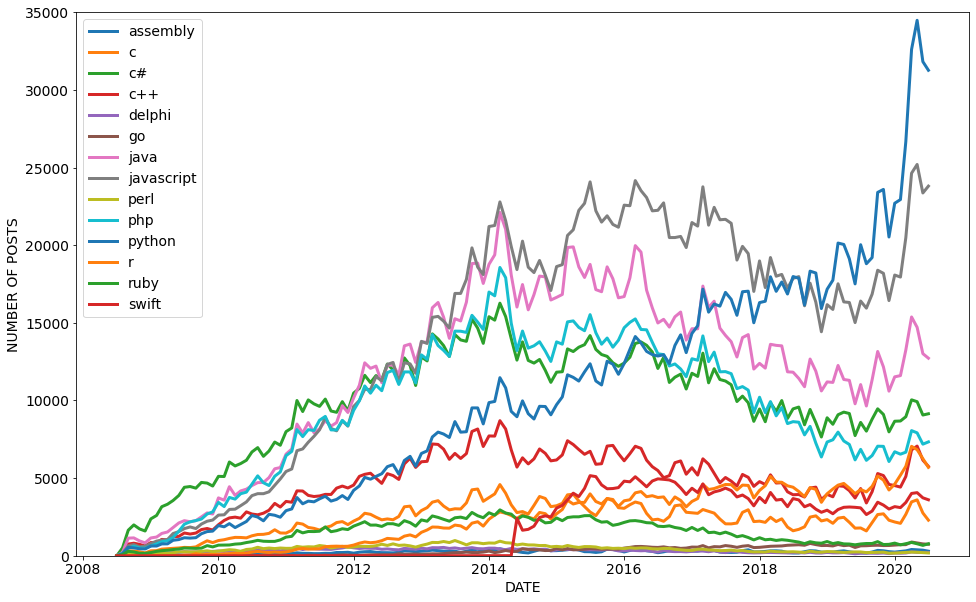

In [55]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('NUMBER OF POSTS', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped.columns:
    plt.plot(reshaped.index, reshaped[column], linewidth=3, label=reshaped[column].name)

plt.legend(fontsize=14)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [ ]:
roll = reshaped.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('NUMBER OF POSTS', fontsize=14)
plt.ylim(0, 35000)

for column in roll.columns:
    plt.plot(roll.index, roll[column], linewidth=3, label=roll[column].name)

plt.legend(fontsize=14)